   Product_ID   Sale_Date Sales_Rep Region   Amount  Sold Product_Category  \
0        1051  2023-01-01       Bob  North  1505.22    92      Electronics   
1        1092  2023-01-02    Dani d   East  8674.55    21        Furniture   
2        1014  2023-01-03    Rami d  South  3029.87    71             Food   
3        1071  2023-01-04    Rami d   West  4392.23    67             Food   
4        1060  2023-01-05       Bob   East  5155.60    47             Food   

   Unit_Cost    Price       Type  Discount Payment_Method Sales_Channel  
0    3348.83  3523.90        New      0.06            UPI        Retail  
1    3427.43  2451.26  Returning      0.16    Credit Card        Online  
2    4665.53  2492.04  Returning      0.16            UPI        Retail  
3    4985.05  1810.48  Returning      0.25  Bank Transfer        Retail  
4    3628.77  4227.39  Returning      0.22           Cash        Retail  

Missing values per column:
Product_ID          0
Sale_Date           0
Sales_Rep      

/tmp/ipython-input-2272862657.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_south, x='Sale_Date', y='Revenue', palette='Blues_d')


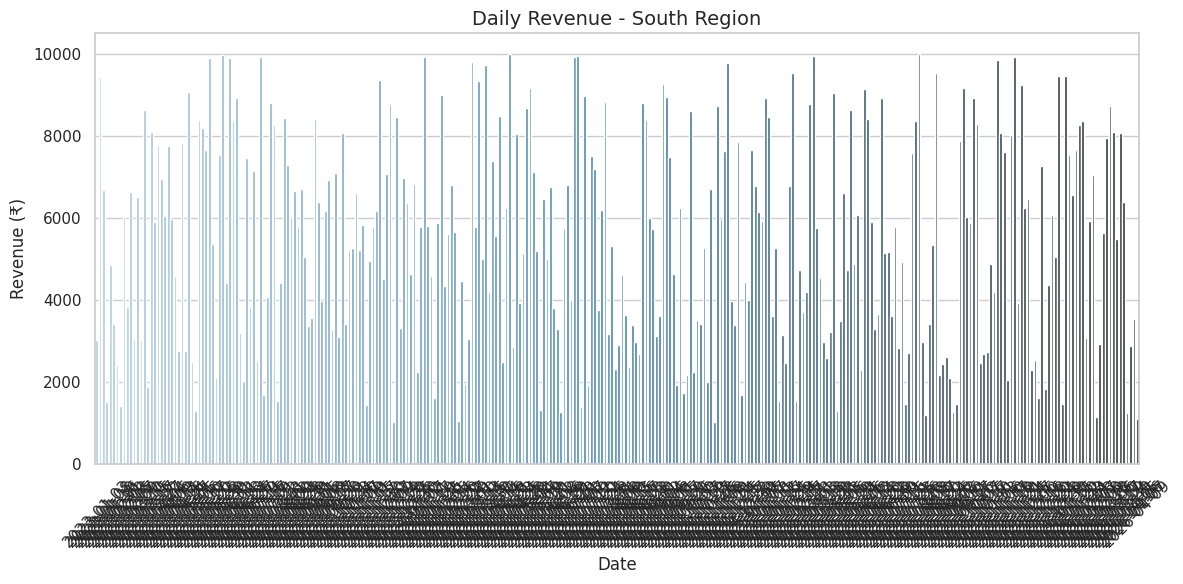

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ------------------------------------------------
# 1. LOAD DATASET
# ------------------------------------------------
# Use your dataset path — update if using Google Colab
df = pd.read_csv('/content/sales_dataset.csv')  # replace with correct path if needed

# Preview first few rows
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# ------------------------------------------------
# 2. DATA CLEANING
# ------------------------------------------------

# Fill missing numeric columns with mean (if any)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert Sale_Date to datetime
if 'Sale_Date' in df.columns:
    df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

# Rename columns for clarity (if applicable)
df.rename(columns={'Cust_ID': 'CustomerID'}, inplace=True)

# Create a new calculated column (Example: Total_Revenue)
# Assuming 'Amount' represents total sale value per transaction
df['Revenue'] = df['Amount']  # if not already present

# Example: derive a profit column (Price - Unit_Cost) * Sold
if {'Price', 'Unit_Cost', 'Sold'}.issubset(df.columns):
    df['Profit'] = (df['Price'] - df['Unit_Cost']) * df['Sold']

# Preview dataset info
print("\nDataset info after cleaning:")
print(df.info())

# ------------------------------------------------
# 3. FILTER REGION FOR VISUALIZATION (e.g., SOUTH)
# ------------------------------------------------
if 'Region' in df.columns:
    df_south = df[df['Region'].str.lower() == 'south']
else:
    raise KeyError("The 'Region' column is missing in the dataset.")

# ------------------------------------------------
# 4. STATIC VISUALIZATION (Seaborn / Matplotlib)
# ------------------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Barplot of total Revenue per Date for South region
sns.barplot(data=df_south, x='Sale_Date', y='Revenue', palette='Blues_d')

# Rotate labels for readability
plt.xticks(rotation=45)

plt.title('Daily Revenue - South Region', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 5. INTERACTIVE VISUALIZATION (Plotly)
# ------------------------------------------------
fig = px.line(
    df_south,
    x='Sale_Date',
    y='Revenue',
    title='Daily Revenue - South Region (Interactive)',
    markers=True,
    labels={'Sale_Date': 'Date', 'Revenue': 'Revenue (₹)'}
)

fig.show()

   Product_ID   Sale_Date Sales_Rep Region   Amount  Sold Product_Category  \
0        1051  2023-01-01       Bob  North  1505.22    92      Electronics   
1        1092  2023-01-02    Dani d   East  8674.55    21        Furniture   
2        1014  2023-01-03    Rami d  South  3029.87    71             Food   
3        1071  2023-01-04    Rami d   West  4392.23    67             Food   
4        1060  2023-01-05       Bob   East  5155.60    47             Food   

   Unit_Cost    Price       Type  Discount Payment_Method Sales_Channel  
0    3348.83  3523.90        New      0.06            UPI        Retail  
1    3427.43  2451.26  Returning      0.16    Credit Card        Online  
2    4665.53  2492.04  Returning      0.16            UPI        Retail  
3    4985.05  1810.48  Returning      0.25  Bank Transfer        Retail  
4    3628.77  4227.39  Returning      0.22           Cash        Retail  

Missing values per column:
Product_ID          0
Sale_Date           0
Sales_Rep      

/tmp/ipython-input-2272862657.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




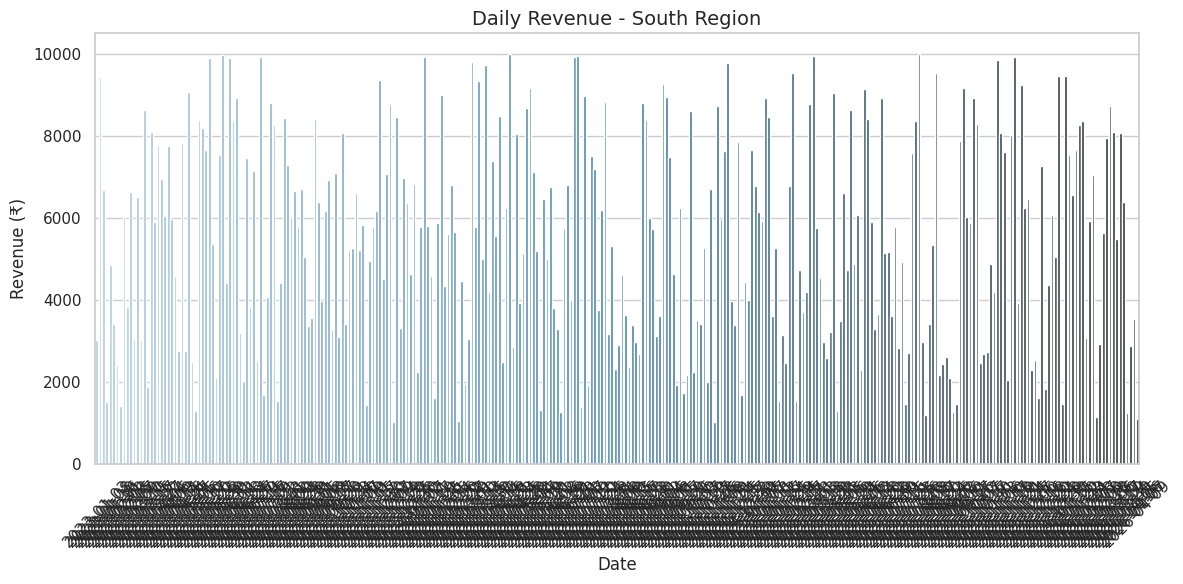

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ------------------------------------------------
# 1. LOAD DATASET
# ------------------------------------------------
# Use your dataset path — update if using Google Colab
df = pd.read_csv('/content/sales_dataset.csv')  # replace with correct path if needed

# Preview first few rows
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# ------------------------------------------------
# 2. DATA CLEANING
# ------------------------------------------------

# Fill missing numeric columns with mean (if any)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Convert Sale_Date to datetime
if 'Sale_Date' in df.columns:
    df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

# Rename columns for clarity (if applicable)
df.rename(columns={'Cust_ID': 'CustomerID'}, inplace=True)

# Create a new calculated column (Example: Total_Revenue)
# Assuming 'Amount' represents total sale value per transaction
df['Revenue'] = df['Amount']  # if not already present

# Example: derive a profit column (Price - Unit_Cost) * Sold
if {'Price', 'Unit_Cost', 'Sold'}.issubset(df.columns):
    df['Profit'] = (df['Price'] - df['Unit_Cost']) * df['Sold']

# Preview dataset info
print("\nDataset info after cleaning:")
print(df.info())

# ------------------------------------------------
# 3. FILTER REGION FOR VISUALIZATION (e.g., SOUTH)
# ------------------------------------------------
if 'Region' in df.columns:
    df_south = df[df['Region'].str.lower() == 'south']
else:
    raise KeyError("The 'Region' column is missing in the dataset.")

# ------------------------------------------------
# 4. STATIC VISUALIZATION (Seaborn / Matplotlib)
# ------------------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Barplot of total Revenue per Date for South region
sns.barplot(data=df_south, x='Sale_Date', y='Revenue', palette='Blues_d')

# Rotate labels for readability
plt.xticks(rotation=45)

plt.title('Daily Revenue - South Region', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 5. INTERACTIVE VISUALIZATION (Plotly)
# ------------------------------------------------
fig = px.line(
    df_south,
    x='Sale_Date',
    y='Revenue',
    title='Daily Revenue - South Region (Interactive)',
    markers=True,
    labels={'Sale_Date': 'Date', 'Revenue': 'Revenue (₹)'}
)

fig.show()

✅ Dataset loaded successfully. Shape: (5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


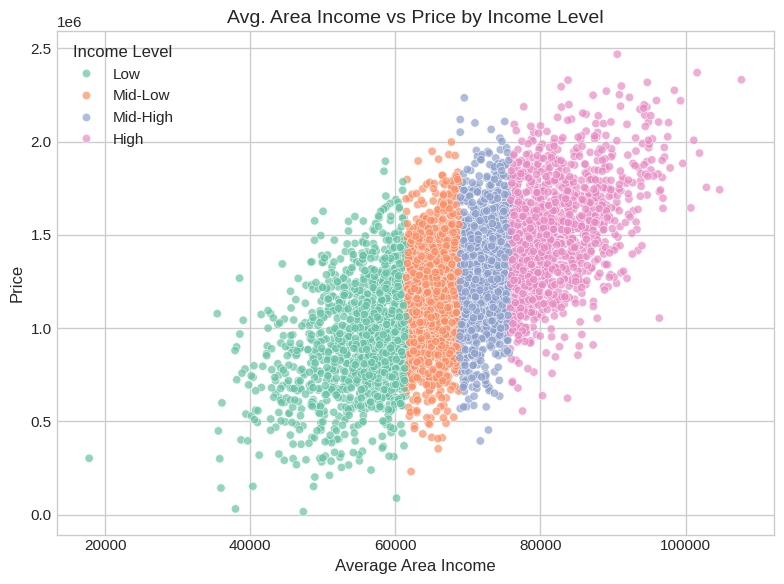

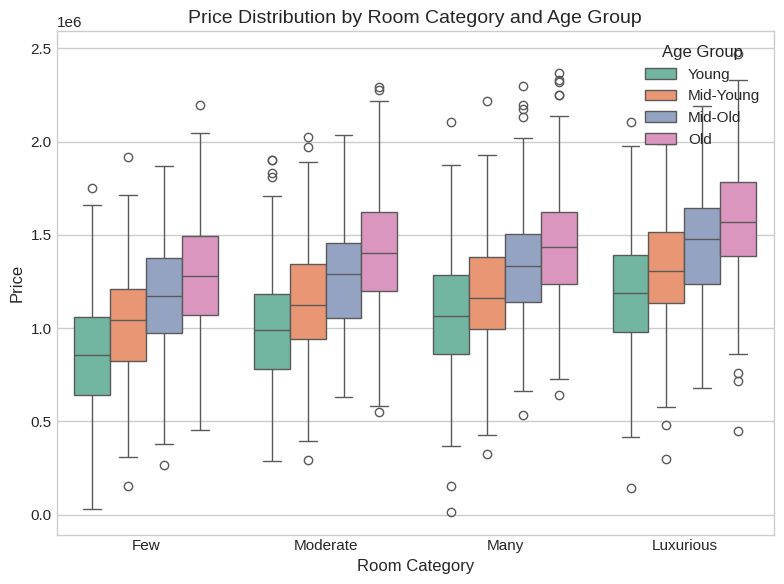

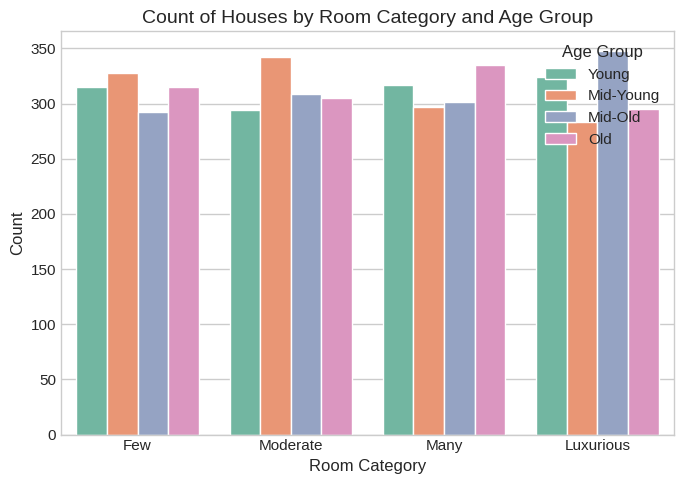

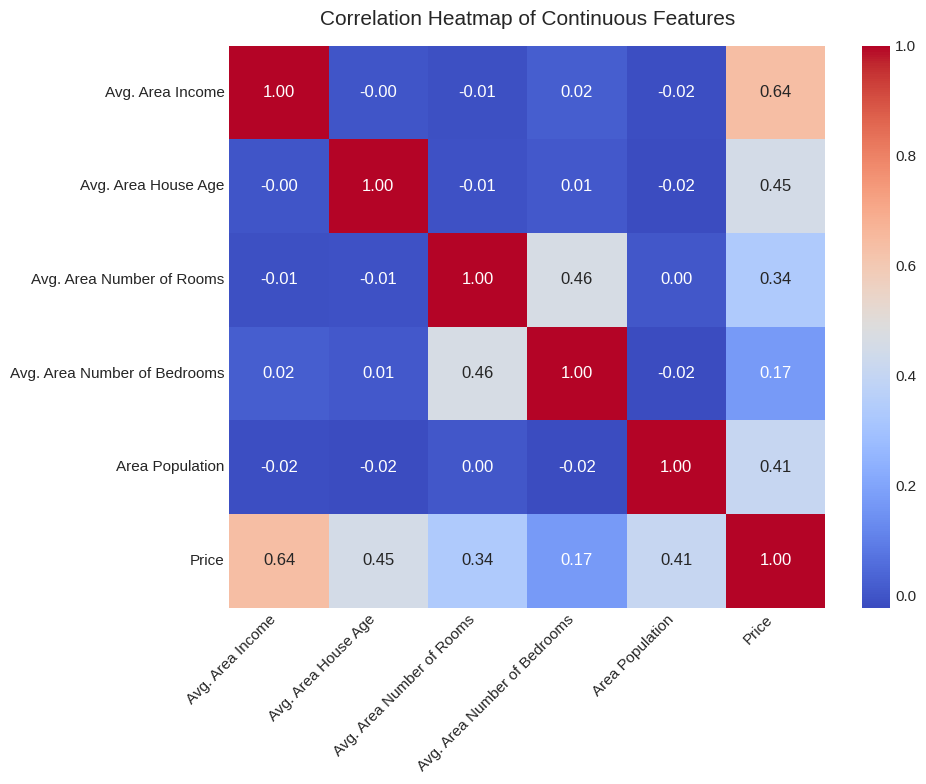

/tmp/ipython-input-3154032624.py:113: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



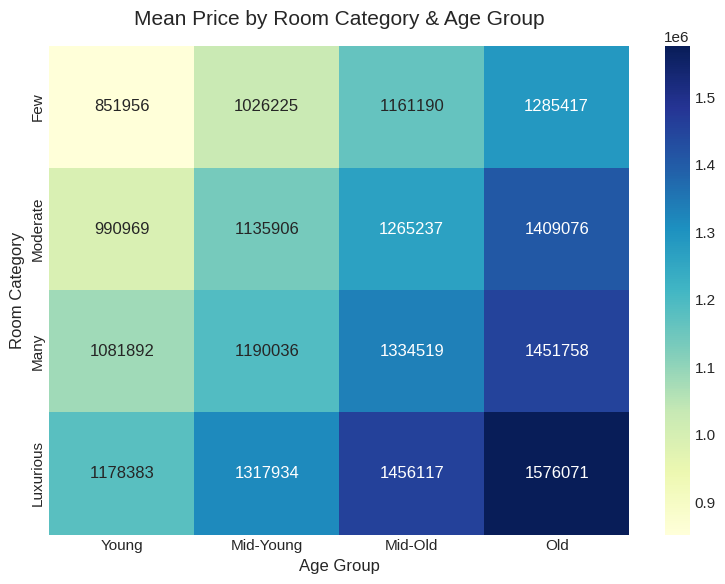

In [3]:
# TASK-3 | Complete Visualization Dashboard(Bivariate Analysis using Continuous & Categorical Data)
# -*- coding: utf-8 -*-

# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🎨 Set consistent style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# -----------------------------
# 🧩 Load and Prepare Data
# -----------------------------
# ✅ Load your dataset (update path if needed)
df = pd.read_csv('/content/housing.csv')

# Clean column names by removing spaces
df.columns = df.columns.str.strip()

# Display a quick preview
print("✅ Dataset loaded successfully. Shape:", df.shape)
display(df.head())

# -----------------------------
# 🧮 Create categorized versions of continuous features
# -----------------------------
df['Income_Level'] = pd.qcut(df['Avg. Area Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
df['Age_Group'] = pd.qcut(df['Avg. Area House Age'], q=4, labels=['Young', 'Mid-Young', 'Mid-Old', 'Old'])
df['Room_Category'] = pd.qcut(df['Avg. Area Number of Rooms'], q=4, labels=['Few', 'Moderate', 'Many', 'Luxurious'])

# -----------------------------
# 1️⃣ Continuous vs Continuous (Scatter)
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Avg. Area Income", y="Price", hue="Income_Level", alpha=0.7)
plt.title("Avg. Area Income vs Price by Income Level", fontsize=14)
plt.xlabel("Average Area Income")
plt.ylabel("Price")
plt.legend(title="Income Level")
plt.tight_layout()
plt.show()

# -----------------------------
# 2️⃣ Boxplot (Continuous vs Categorical)
# -----------------------------
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Room_Category", y="Price", hue="Age_Group")
plt.title("Price Distribution by Room Category and Age Group", fontsize=14)
plt.xlabel("Room Category")
plt.ylabel("Price")
plt.legend(title="Age Group", loc="upper right")
plt.tight_layout()
plt.show()

# -----------------------------
# 3️⃣ Countplot (Categorical vs Categorical)
# -----------------------------
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Room_Category", hue="Age_Group")
plt.title("Count of Houses by Room Category and Age Group", fontsize=14)
plt.xlabel("Room Category")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

# -----------------------------
# 4️⃣ Correlation Heatmap (Continuous Features)
# -----------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Features", fontsize=15, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# -----------------------------
# 5️⃣ Interactive Parallel Categories Plot (Plotly)
# -----------------------------
fig = px.parallel_categories(
    df,
    dimensions=['Room_Category', 'Age_Group', 'Income_Level'],
    color='Price',
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(title='Parallel Categories: House Features & Price', title_x=0.5)
fig.show()

# -----------------------------
# 6️⃣ Interactive 3D Scatter (Plotly)
# -----------------------------
fig = px.scatter_3d(
    df,
    x='Avg. Area Income',
    y='Price',
    z='Area Population',
    color='Age_Group',
    symbol='Room_Category',
    title='3D Scatter: Income, Price & Population by Age/Room Category',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(title_x=0.5)
fig.show()

# -----------------------------
# 7️⃣ Heatmap of Mean Price by Categorical Bins
# -----------------------------
pivot = pd.pivot_table(df, values='Price', index='Room_Category', columns='Age_Group', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Mean Price by Room Category & Age Group', fontsize=15, pad=15)
plt.xlabel("Age Group")
plt.ylabel("Room Category")
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

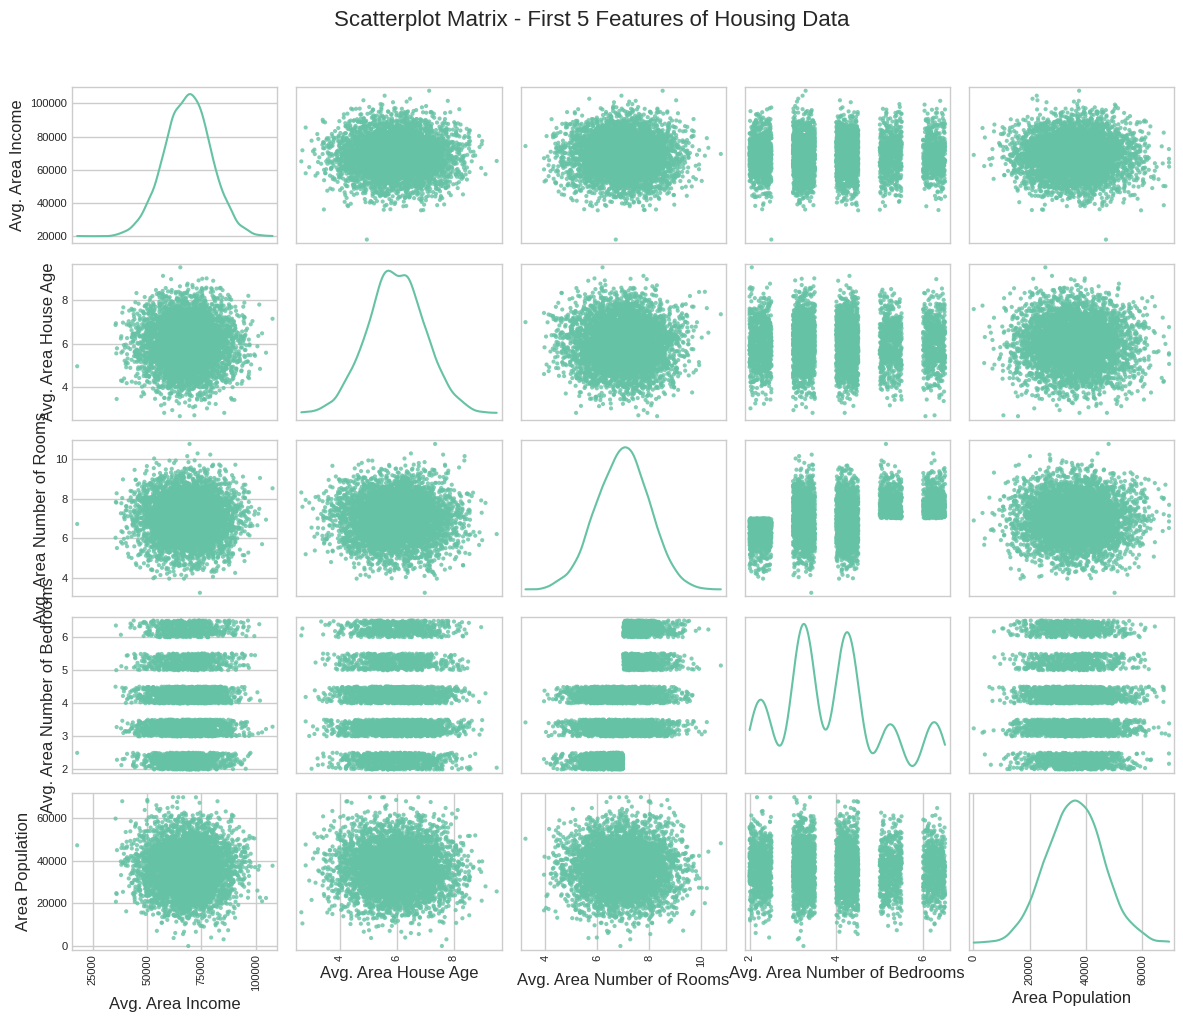

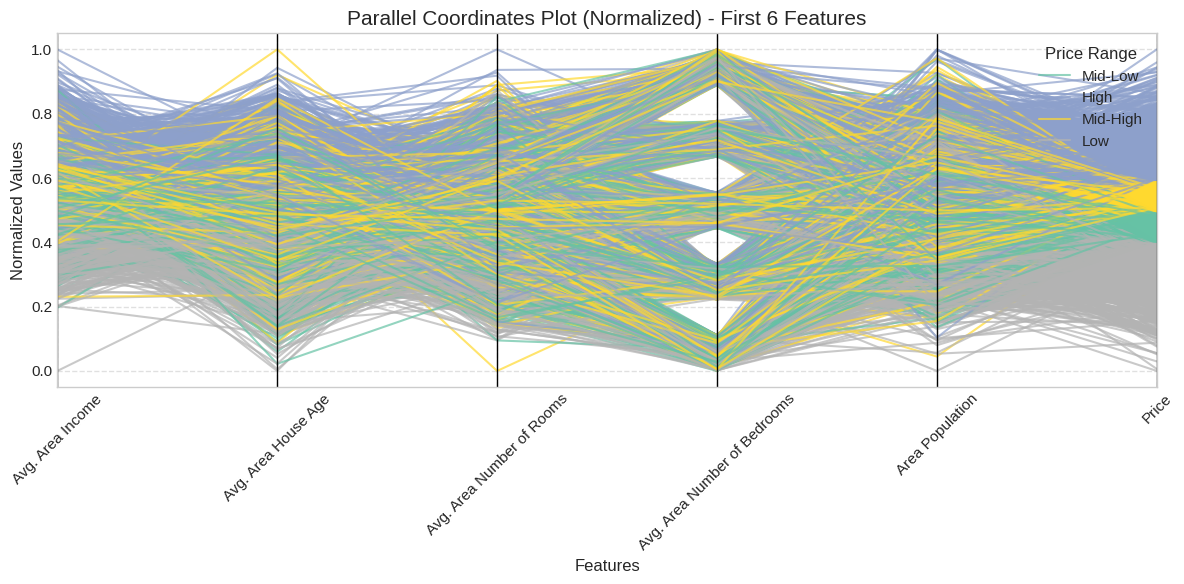

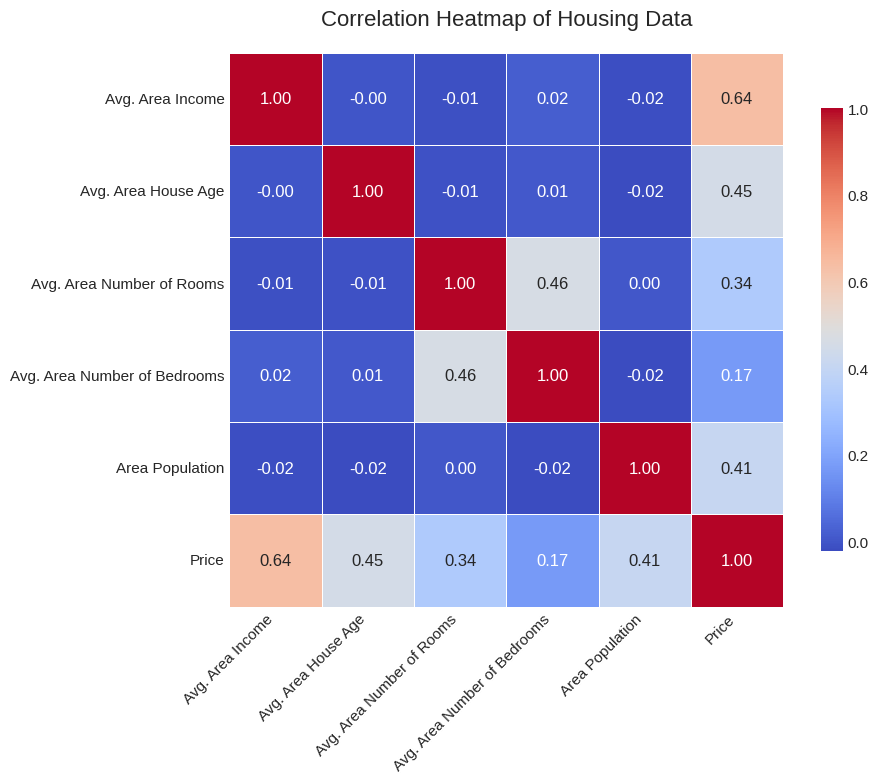

In [4]:
#TASK-4(To Visualize and perform Multivariate analysis using Multiple variables )
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load dataset
df = pd.read_csv('/content/housing.csv')

# -----------------------------
# 1️⃣ Scatterplot Matrix
# -----------------------------
plt.figure(figsize=(12, 10))
scatter_matrix(
    df.iloc[:, :5],
    figsize=(12, 10),
    diagonal='kde',
    alpha=0.8,
    color=sns.color_palette("Set2")[0]
)
plt.suptitle("Scatterplot Matrix - First 5 Features of Housing Data", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# -----------------------------
# 2️⃣ Parallel Coordinates Plot (clean version)
# -----------------------------
# Normalize values for better comparison
scaler = MinMaxScaler()
scaled_df = df.copy()
scaled_df[df.columns[:6]] = scaler.fit_transform(df[df.columns[:6]])

# Bin the 'Price' column into categories for better color distinction
if 'Price' in df.columns:
    scaled_df['Price Category'] = pd.qcut(df['Price'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

    plt.figure(figsize=(12, 6))
    parallel_coordinates(
        scaled_df,
        class_column='Price Category',
        cols=df.columns[:6],
        colormap=plt.get_cmap("Set2"),
        alpha=0.7
    )
    plt.title("Parallel Coordinates Plot (Normalized) - First 6 Features", fontsize=15)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Normalized Values", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Price Range", loc="upper right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'Price' column not found. Skipping Parallel Coordinates Plot.")

# -----------------------------
# 3️⃣ Correlation Heatmap (clean version)
# -----------------------------
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Housing Data", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#TASK-5(Data Visualization for Trees )

import pandas as pd
import plotly.express as px

# Load dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv"
df = pd.read_csv(url)

# Inspect columns
print(df.columns)
print(df.head())


# For hierarchy, choose: Region → State → Category → Export Value
# Let's say categories are: “fruit exports”, “beef exports”, “poultry exports”, etc.

# TreeMap
fig_treemap = px.treemap(
    df,
    path=['state', 'category'],  # Hierarchy: state → category
    values='total exports',   # numerical measure
    color='total exports',
    color_continuous_scale='Viridis',
    title="TreeMap: US Agriculture Exports by State and Category (2011)"
)
fig_treemap.show()

# Sunburst
fig_sunburst = px.sunburst(
    df,
    path=['state', 'category'],
    values='total exports',
    color='total exports',
    color_continuous_scale='Plasma',
    title="Sunburst: US Agriculture Exports by State and Category (2011)"
)
fig_sunburst.show()


In [ ]:
#TASK-6(Design and Perform visualization for Graphs and Networks)
import networkx as nx
import matplotlib.pyplot as plt
# ---- Step 1: Create sample dataset (edges) ----
edges = [
("Alice", "Bob"),
("Alice", "Cathy"),
("Alice", "David"),
("Bob", "Eve"),
("Cathy", "Frank"),
("David", "Grace"),
("Eve", "Helen"),
("Frank", "Grace"),
("Helen", "Ivy"),
("Grace", "Jack"),
("Ivy", "Jack")
]
# ---- Step 2: Create a Graph ----
G = nx.Graph()
G.add_edges_from(edges)
# ---- Step 3: Compute Force-based Layout ----
# spring_layout uses the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G, seed=42)
# ---- Step 4: Visualize the Graph ----
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True,
node_color='lightblue',
node_size=1200,
font_size=10,
font_weight='bold',
edge_color='gray')
plt.title("Force-based Layout Visualization", fontsize=14)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


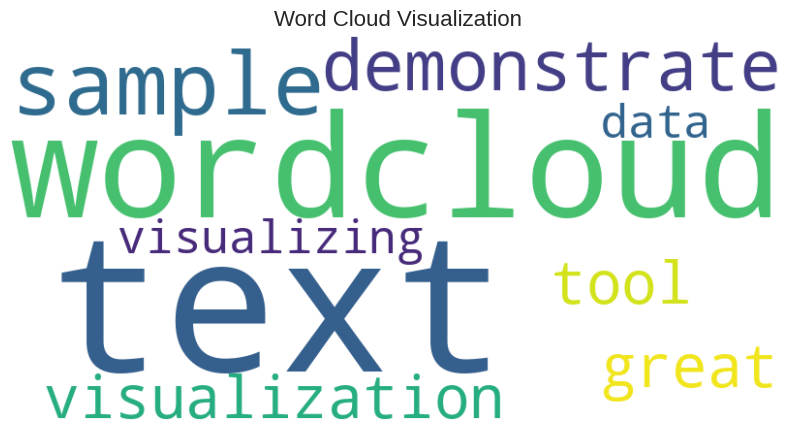

In [5]:
#TASK-7(To generate insight using Text Network Analysis and Visualization Tools: Wordle, Tag Cloud, WordTree, InfraNodus)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource

# Define the text variable with some sample text
text = "This is some sample text to demonstrate the WordCloud visualization. WordCloud is a great tool for visualizing text data."

# Preprocess text
tokens = word_tokenize(text.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization", fontsize=16)
plt.show()

Data Loaded: (9994, 21)


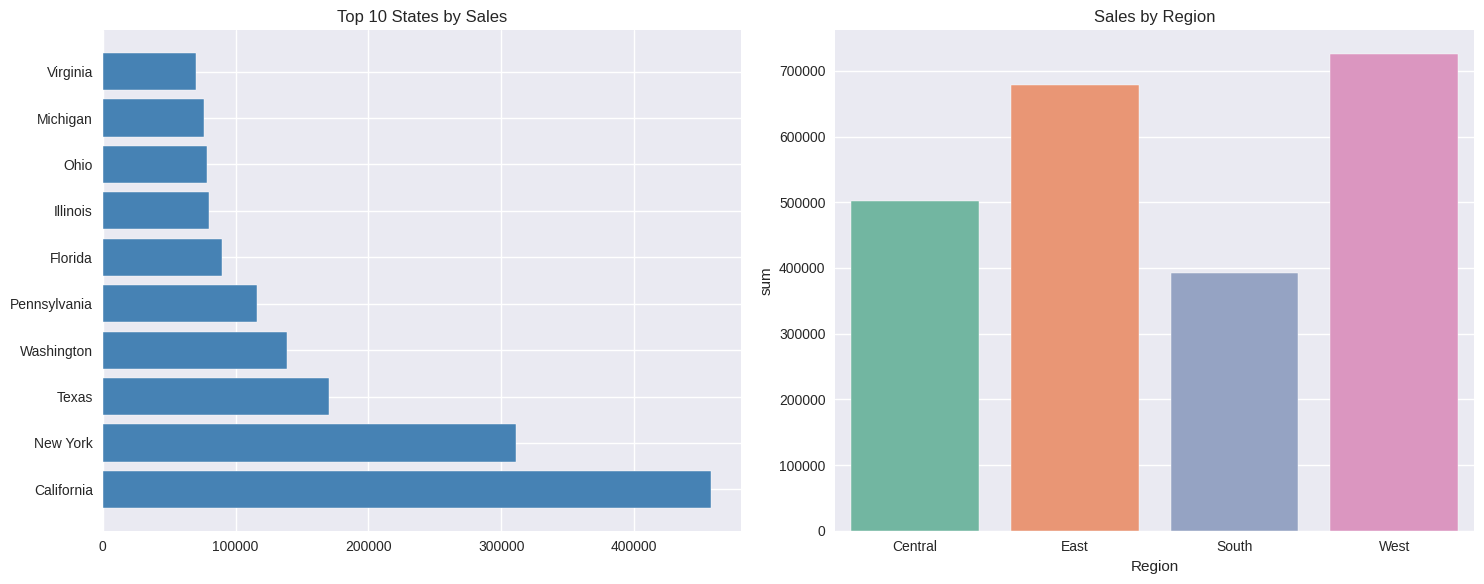

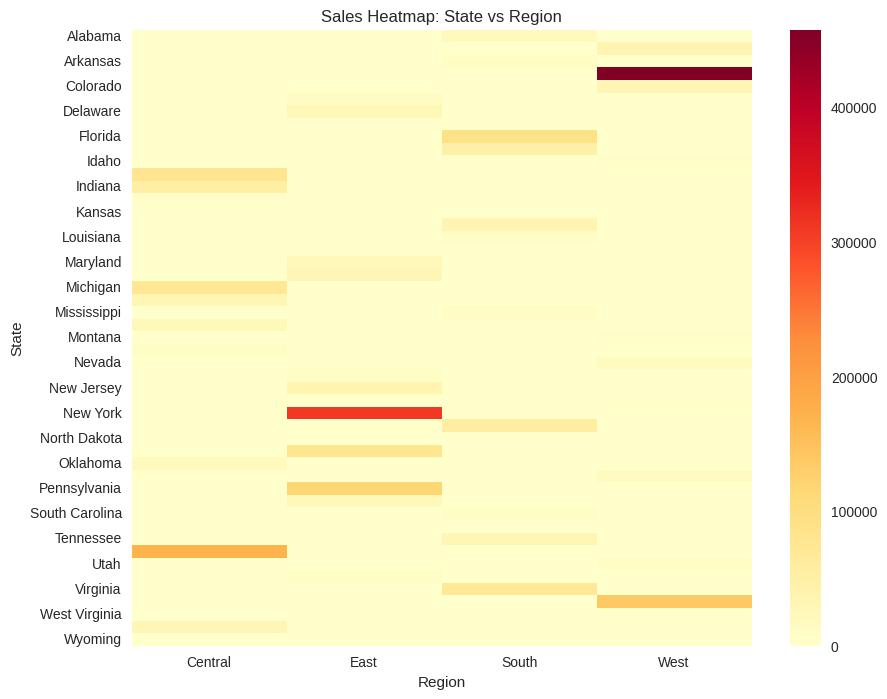


--- SUMMARY ---
Total States: 49, Total Sales: $2,297,200.86
Top 5 States:
            State  Total_Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
Sales by Region:
     Region          sum        mean
0  Central  501239.8908  215.772661
1     East  678781.2400  238.336110
2    South  391721.9050  241.803645
3     West  725457.8245  226.493233


In [6]:
# ===============================
# TASK-8: Spatial & Geospatial Data Visualization
# ===============================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, folium, plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# -------------------------------
# 1. Load & Prepare Data
# -------------------------------
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')
df['State'] = df['State'].str.strip()
print("Data Loaded:", df.shape)

# -------------------------------
# 2. Aggregate Sales by State & Region
# -------------------------------
state_sales = df.groupby('State')['Sales'].agg(['sum', 'count']).reset_index().sort_values('sum', ascending=False)
region_sales = df.groupby('Region')['Sales'].agg(['sum', 'mean']).reset_index()
state_sales.columns = ['State', 'Total_Sales', 'Order_Count']

# -------------------------------
# 3. Plotly Choropleth (Sales by State)
# -------------------------------
abbr = {'California':'CA','Texas':'TX','New York':'NY','Florida':'FL','Illinois':'IL','Washington':'WA','Ohio':'OH','Michigan':'MI','Virginia':'VA'}
state_sales['Abbr'] = state_sales['State'].map(abbr)

fig = px.choropleth(state_sales, locations='Abbr', locationmode='USA-states',
                    color='Total_Sales', scope='usa', color_continuous_scale='Blues',
                    title='Superstore Sales by State', hover_name='State')
fig.update_layout(title_x=0.5)
fig.show()

# -------------------------------
# 4. Basic Visuals (Top States & Regions)
# -------------------------------
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
top = state_sales.head(10)
ax[0].barh(top['State'], top['Total_Sales'], color='steelblue')
ax[0].set_title('Top 10 States by Sales')
sns.barplot(x='Region', y='sum', data=region_sales, ax=ax[1], palette='Set2')
ax[1].set_title('Sales by Region')
plt.tight_layout(); plt.show()

# -------------------------------
# 5. Folium Interactive Map
# -------------------------------
coords = {'California':[36.7,-119.4],'Texas':[31.9,-99.9],'New York':[40.7,-74.0],'Florida':[27.7,-81.5],'Illinois':[40.6,-89.4]}
m = folium.Map(location=[39.8,-98.6], zoom_start=4, tiles='CartoDB positron')

for _, row in state_sales.iterrows():
    if row['State'] in coords:
        lat, lon = coords[row['State']]
        folium.CircleMarker(
            [lat, lon],
            radius=np.log(row['Total_Sales'])*2,
            color='blue', fill=True,
            tooltip=f"{row['State']}: ${row['Total_Sales']:.0f}"
        ).add_to(m)
m.save("superstore_sales_map.html")

# -------------------------------
# 6. Heatmap: State vs Region
# -------------------------------
pivot = df.pivot_table(values='Sales', index='State', columns='Region', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Sales Heatmap: State vs Region")
plt.show()

# -------------------------------
# 7. Summary Insights
# -------------------------------
print("\n--- SUMMARY ---")
print(f"Total States: {len(state_sales)}, Total Sales: ${df['Sales'].sum():,.2f}")
print("Top 5 States:\n", state_sales.head(5)[['State','Total_Sales']])
print("Sales by Region:\n", region_sales)


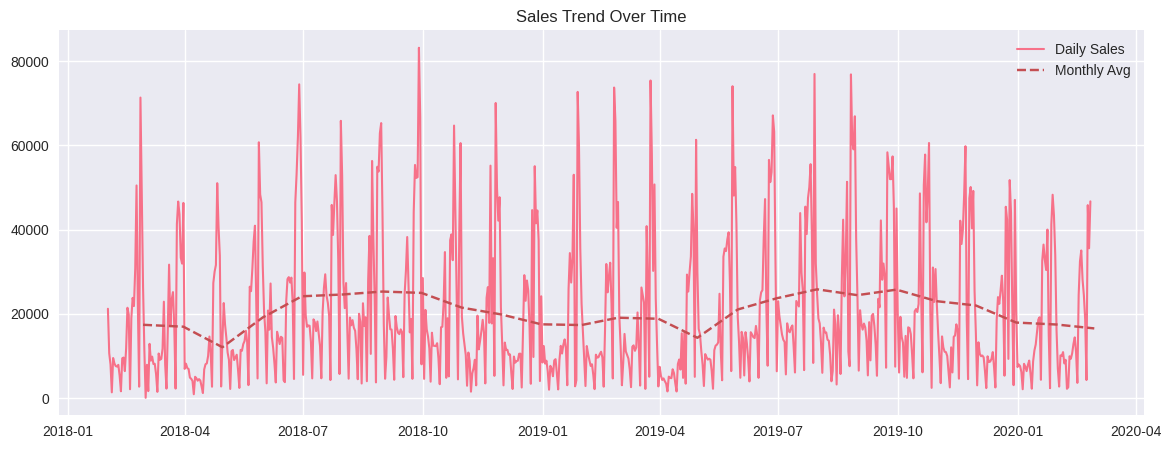

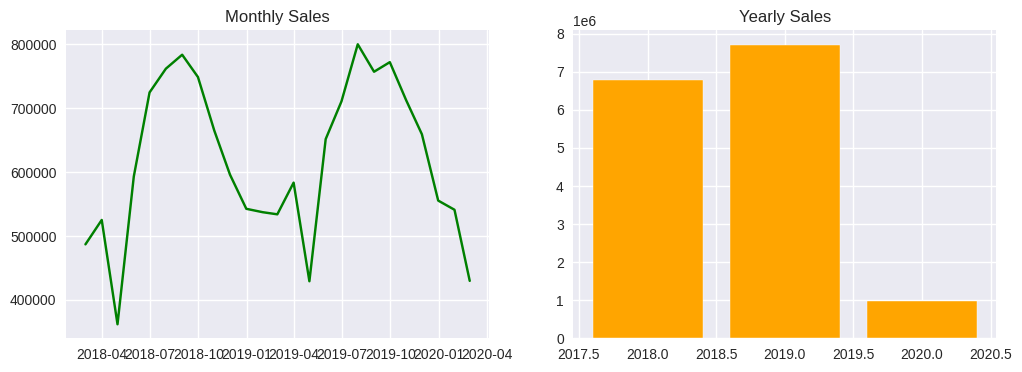

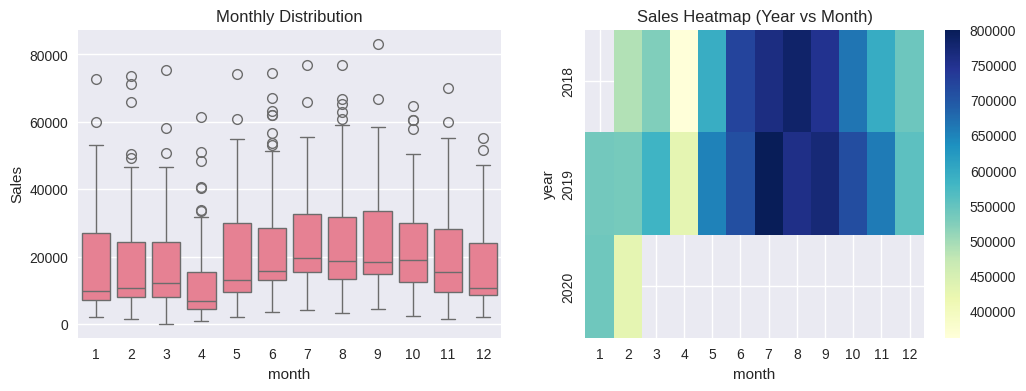

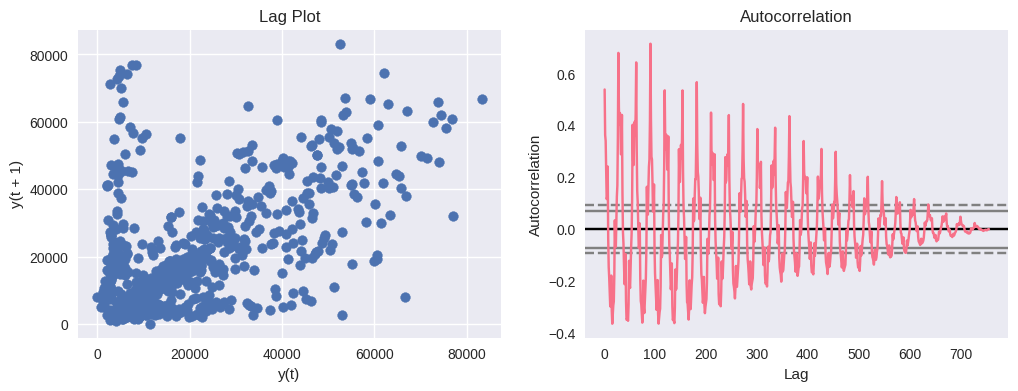

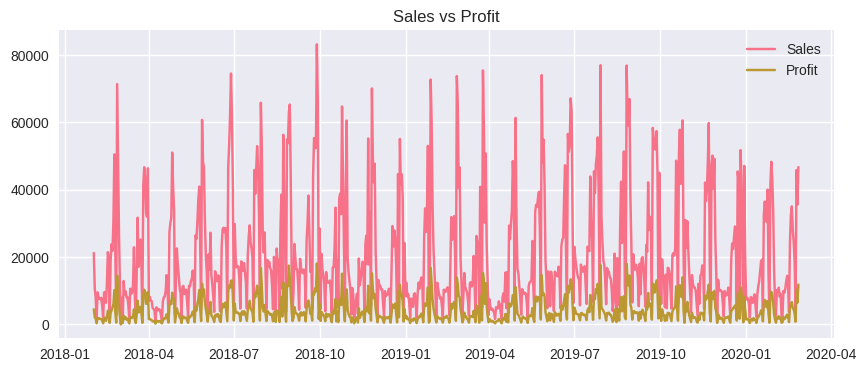

In [7]:
# ==========================
# TASK-9: Time Series Analysis
# ==========================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8'); sns.set_palette("husl")

# 1️⃣ Load and Prepare Data
df = pd.read_excel("/content/Groceries_Sales_data.xlsx")
df['Date'] = pd.to_datetime(df['Date']); df.set_index('Date', inplace=True)
df['year'], df['month'], df['quarter'] = df.index.year, df.index.month, df.index.quarter

# 2️⃣ Trend Analysis
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Sales'], label='Daily Sales', linewidth=1.5)
plt.plot(df['Sales'].resample('M').mean(), 'r--', label='Monthly Avg')
plt.title('Sales Trend Over Time'); plt.legend(); plt.show()

# 3️⃣ Monthly & Yearly Overview
monthly = df['Sales'].resample('M').sum(); yearly = df['Sales'].resample('Y').sum()
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(monthly.index, monthly.values, color='green'); ax[0].set_title('Monthly Sales')
ax[1].bar(yearly.index.year, yearly.values, color='orange'); ax[1].set_title('Yearly Sales')
plt.show()

# 4️⃣ Seasonality & Distribution
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='month', y='Sales', data=df, ax=ax[0]); ax[0].set_title('Monthly Distribution')
sns.heatmap(df.groupby(['year','month'])['Sales'].sum().unstack(), cmap='YlGnBu', ax=ax[1])
ax[1].set_title('Sales Heatmap (Year vs Month)'); plt.show()

# 5️⃣ Lag & Autocorrelation
fig, ax = plt.subplots(1,2, figsize=(12,4))
lag_plot(df['Sales'], ax=ax[0]); autocorrelation_plot(df['Sales'], ax=ax[1])
ax[0].set_title('Lag Plot'); ax[1].set_title('Autocorrelation'); plt.show()

# 6️⃣ Profit Analysis (Simulated if Missing)
if 'profit' not in df.columns:
    np.random.seed(42)
    df['profit'] = df['Sales'] * 0.2 * (1 + np.random.normal(0, 0.1, len(df)))
df['profit_margin'] = df['profit'] / df['Sales']
plt.figure(figsize=(10,4))
plt.plot(df['Sales'], label='Sales'); plt.plot(df['profit'], label='Profit')
plt.title('Sales vs Profit'); plt.legend(); plt.show()
